In [1]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
#Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

In [3]:
!mkdir -p cats_and_dogs/test/unknown
!mv cats_and_dogs/test/*.jpg cats_and_dogs/test/unknown/


In [4]:
# 3
train_image_generator = ImageDataGenerator(rescale=1.0/255)
validation_image_generator = ImageDataGenerator(rescale=1.0/255)
test_image_generator = ImageDataGenerator(rescale=1.0/255)

train_data_gen = train_image_generator.flow_from_directory(
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary',
    batch_size=batch_size,
)

val_data_gen = validation_image_generator.flow_from_directory(
    directory=validation_dir,
     target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,

    class_mode='binary',
)

test_data_gen = test_image_generator.flow_from_directory(
    directory=test_dir,
     target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode=None,  # No labels
    shuffle=False  # Important for keeping test output order consistent
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


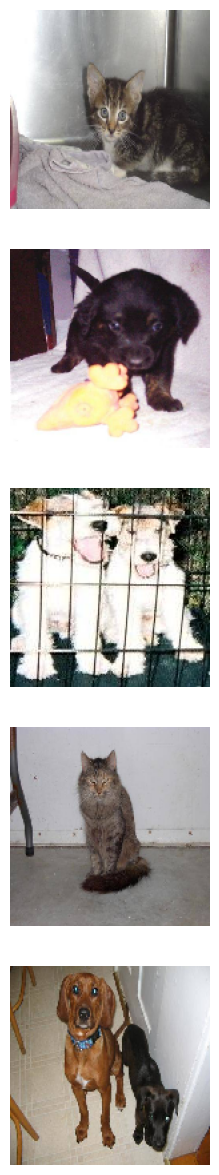

In [5]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [6]:
# 5
train_image_generator = ImageDataGenerator(rescale=1.0/255,zoom_range=0.3, brightness_range=[0.2,1], rotation_range=0.6,horizontal_flip=True)


Found 2000 images belonging to 2 classes.


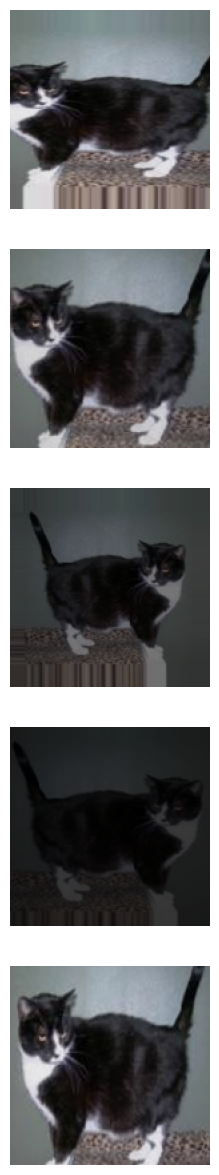

In [7]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [8]:
# 7
model = Sequential()

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    # Flatten to 1D
    Flatten(),

    # Fully connected layer with ReLU
    Dense(128, activation='relu'),

    # Optional dropout for regularization
    Dropout(0.5),

    # Output layer — 1 neuron with sigmoid for binary classification probabilities
    Dense(1, activation='sigmoid')

])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# 8
history = model.fit(
    x=train_data_gen,
    steps_per_epoch=train_data_gen.samples // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=val_data_gen.samples // batch_size

)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 116s 8s/step - accuracy: 0.5071 - loss: 0.7770 - val_accuracy: 0.4955 - val_loss: 0.7001
Epoch 2/15
 1/15 ━━━━━━━━━━━━━━━━━━━━ 1:11 5s/step - accuracy: 0.5156 - loss: 0.6935

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.5156 - loss: 0.6935 - val_accuracy: 0.4877 - val_loss: 0.7008
Epoch 3/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 113s 7s/step - accuracy: 0.5285 - loss: 0.6877 - val_accuracy: 0.5647 - val_loss: 0.6690
Epoch 4/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.6016 - loss: 0.6660 - val_accuracy: 0.5926 - val_loss: 0.6600
Epoch 5/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 142s 9s/step - accuracy: 0.5827 - loss: 0.6786 - val_accuracy: 0.6283 - val_loss: 0.6510
Epoch 6/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 18s 954ms/step - accuracy: 0.6875 - loss: 0.6288 - val_accuracy: 0.6306 - val_loss: 0.6457
Epoch 7/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 202s 11s/step - accuracy: 0.6234 - loss: 0.6534 - val_accuracy: 0.6094 - val_loss: 0.6602
Epoch 8/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 18s 988ms/step - accuracy: 0.5750 - loss: 0.6611 - val_accuracy: 0.6105 - val_loss: 0.6532
Epoch 9/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 142s 8s/step - accuracy: 0.6522 - loss: 0.6332 - val_accuracy: 0.5647 - val_loss:

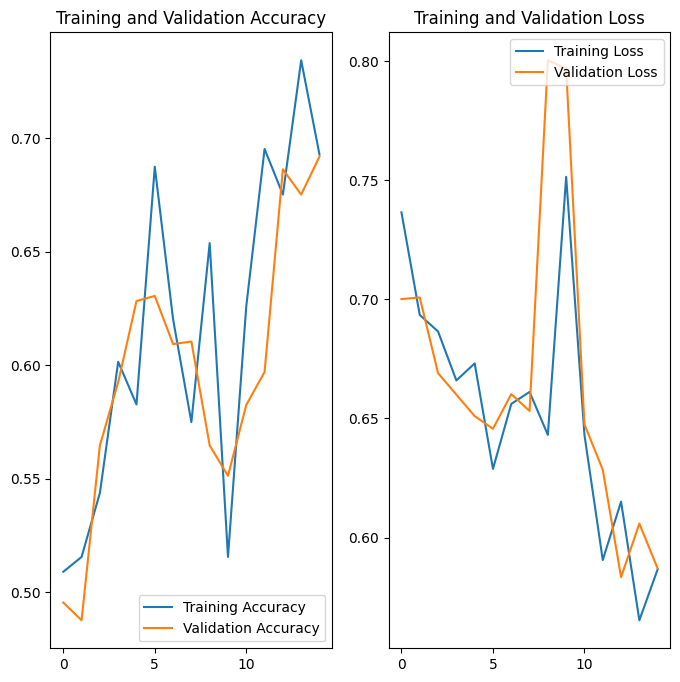

In [10]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Found 50 images belonging to 1 classes.
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 437ms/step
[[0.46352854]
 [0.27806312]
 [0.0949775 ]
 [0.841645  ]
 [0.62958735]]
[np.float32(0.46352854), np.float32(0.27806312), np.float32(0.0949775), np.float32(0.841645), np.float32(0.62958735)]


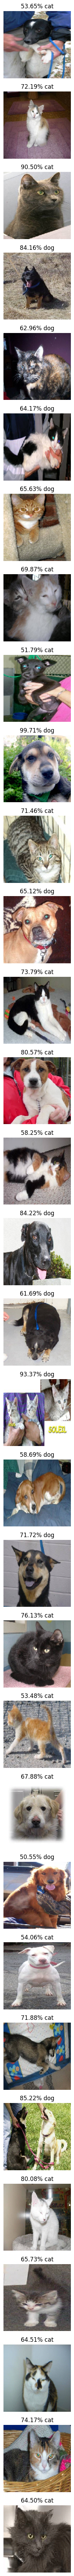

In [11]:
test_data_gen = test_image_generator.flow_from_directory(
    directory=test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    shuffle=False
)

# Get probabilities from the model (output is a NumPy array of shape (n, 1))
predictions = model.predict(test_data_gen, batch_size=batch_size)

print(predictions[:5])
# Convert the probabilities to a list of ints (e.g., percentage * 100)
# Optional: flatten first if shape is (n, 1)
probabilities = [p[0] for p in predictions]
print(probabilities[:5])

# Get test images to visualize (x is image tensor, y is label — but we only need x)
test_images, _ = next(test_data_gen)  # First batch (if test set < batch size)

# Call the function to plot
plotImages(test_images, probabilities)


In [12]:
# 11
print(probabilities)
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

[np.float32(0.46352854), np.float32(0.27806312), np.float32(0.0949775), np.float32(0.841645), np.float32(0.62958735), np.float32(0.6417368), np.float32(0.6562553), np.float32(0.30133918), np.float32(0.48212487), np.float32(0.9970716), np.float32(0.28536585), np.float32(0.6511777), np.float32(0.26213557), np.float32(0.19426134), np.float32(0.4175293), np.float32(0.8421987), np.float32(0.6168845), np.float32(0.9337075), np.float32(0.58685213), np.float32(0.7172105), np.float32(0.23865356), np.float32(0.4652017), np.float32(0.3211524), np.float32(0.5055159), np.float32(0.4593734), np.float32(0.28117487), np.float32(0.85219723), np.float32(0.19924413), np.float32(0.3426961), np.float32(0.35491413), np.float32(0.25834963), np.float32(0.354958), np.float32(0.8336722), np.float32(0.9999968), np.float32(0.3553881), np.float32(0.71323884), np.float32(0.99995816), np.float32(0.7680072), np.float32(0.24249047), np.float32(0.50281674), np.float32(0.40132913), np.float32(0.4656126), np.float32(0.96